### **LEVEL 1**


# *Task 1*

*: Data Exploration and Preprocessing*

In [ ]:
import pandas as pd


df = pd.read_csv('/content/Dataset .csv')

df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)
df['Address Length'] = df['Address'].apply(len)

df_encoded = pd.get_dummies(df, columns=['Has Table booking', 'Has Online delivery'])




# *Task 2*

*: Descriptive Analysis*

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Dataset .csv')

numerical_stats = df.describe()

country_code_counts = df['Country Code'].value_counts()
city_counts = df['City'].value_counts()
cuisines_counts = df['Cuisines'].value_counts()

top_cuisines = cuisines_counts.idxmax()
top_city = city_counts.idxmax()

print(f"Numerical columns statistics:\n{numerical_stats}\n")
print(f"Distribution of 'Country Code':\n{country_code_counts}\n")
print(f"Distribution of 'City':\n{city_counts}\n")
print(f"Distribution of 'Cuisines':\n{cuisines_counts}\n")
print(f"Top cuisine: {top_cuisines}")
print(f"City with the highest number of restaurants: {top_city}")


Numerical columns statistics:
       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              2

#  *Task 3*

*: Geospatial Analysis*

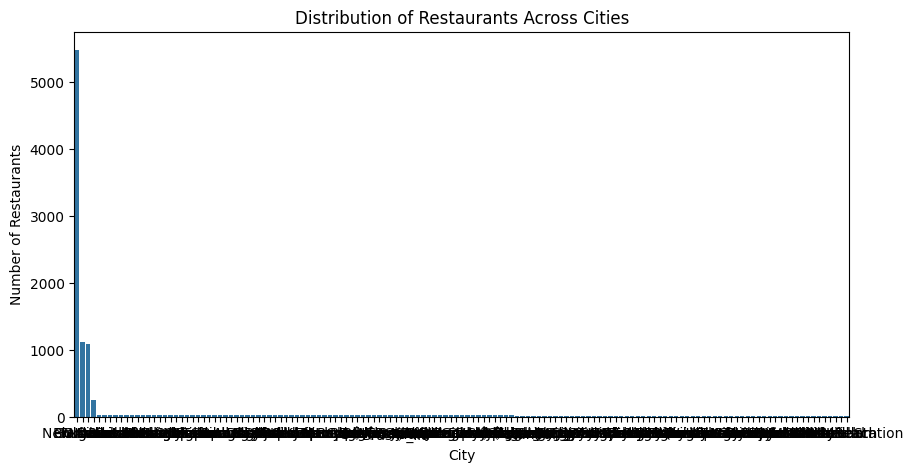

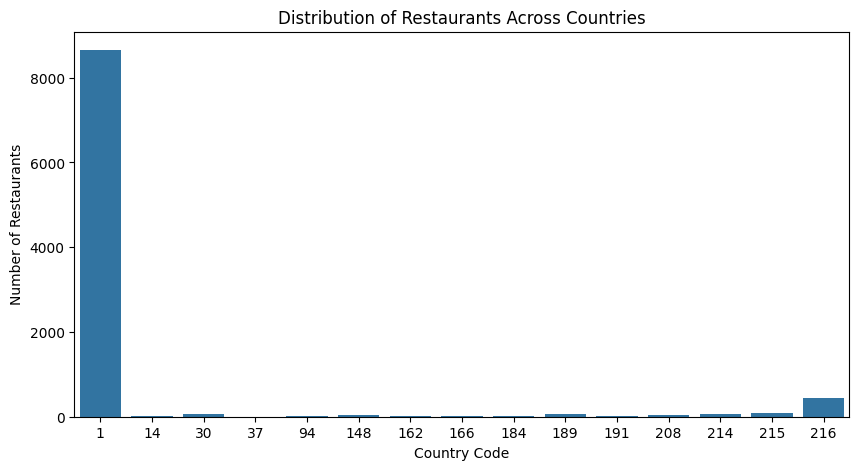

Correlation between latitude and rating: 0.0005155806902360317
Correlation between longitude and rating: -0.11681757734540432


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

df = pd.read_csv('/content/Dataset .csv')

city_counts = df['City'].value_counts()
country_counts = df['Country Code'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.title('Distribution of Restaurants Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Distribution of Restaurants Across Countries')
plt.xlabel('Country Code')
plt.ylabel('Number of Restaurants')
plt.show()

latitude_rating_corr, _ = pearsonr(df['Latitude'], df['Aggregate rating'])
longitude_rating_corr, _ = pearsonr(df['Longitude'], df['Aggregate rating'])

print(f"Correlation between latitude and rating: {latitude_rating_corr}")
print(f"Correlation between longitude and rating: {longitude_rating_corr}")


# **level 2**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Dataset .csv')

table_booking = df['Has Table booking'] == 'Yes'
online_delivery = df['Has Online delivery'] == 'Yes'

percent_table_booking = (table_booking.sum() / df.shape[0]) * 100
percent_online_delivery = (online_delivery.sum() / df.shape[0]) * 100

print(f"Percentage of restaurants that offer table booking: {percent_table_booking:.2f}%")
print(f"Percentage of restaurants that offer online delivery: {percent_online_delivery:.2f}%")

average_rating_with_table_booking = df[table_booking]['Aggregate rating'].mean()
average_rating_without_table_booking = df[~table_booking]['Aggregate rating'].mean()

print(f"Average rating of restaurants with table booking: {average_rating_with_table_booking:.2f}")
print(f"Average rating of restaurants without table booking: {average_rating_without_table_booking:.2f}")

for price_range in df['Price range'].unique():
    percent_online_delivery_in_price_range = (online_delivery[df['Price range'] == price_range].sum() / (df['Price range'] == price_range).sum()) * 100
    print(f"Percentage of restaurants that offer online delivery in price range {price_range}: {percent_online_delivery_in_price_range:.2f}%")


Percentage of restaurants that offer table booking: 12.12%
Percentage of restaurants that offer online delivery: 25.66%
Average rating of restaurants with table booking: 3.44
Average rating of restaurants without table booking: 2.56
Percentage of restaurants that offer online delivery in price range 3: 29.19%
Percentage of restaurants that offer online delivery in price range 4: 9.04%
Percentage of restaurants that offer online delivery in price range 2: 41.31%
Percentage of restaurants that offer online delivery in price range 1: 15.77%


In [ ]:

most_common_price_range = df['Price range'].mode()[0]
print(f"The most common price range among all the restaurants is: {most_common_price_range}")

average_rating_per_price_range = df.groupby('Price range')['Aggregate rating'].mean()
print("The average rating for each price range is:")
print(average_rating_per_price_range)

average_rating_per_color = df.groupby('Rating color')['Aggregate rating'].mean()

color_with_highest_average_rating = average_rating_per_color.idxmax()
print(f"The color that represents the highest average rating among different price ranges is: {color_with_highest_average_rating}")


The most common price range among all the restaurants is: 1
The average rating for each price range is:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64
The color that represents the highest average rating among different price ranges is: Dark Green


In [ ]:

df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)

df['Address Length'] = df['Address'].apply(len)

df_encoded = pd.get_dummies(df, columns=['Has Table booking', 'Has Online delivery'])



# **level 3**


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/Dataset .csv')

for col in df.select_dtypes(include=['object']):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_rmse = mean_squared_error(y_test, lr_preds, squared=False)

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
dt_rmse = mean_squared_error(y_test, dt_preds, squared=False)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)

print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Decision Tree RMSE: {dt_rmse}")
print(f"Random Forest RMSE: {rf_rmse}")


Linear Regression RMSE: 1.1040053935127654
Decision Tree RMSE: 0.2368907261106186
Random Forest RMSE: 0.16531658257762244


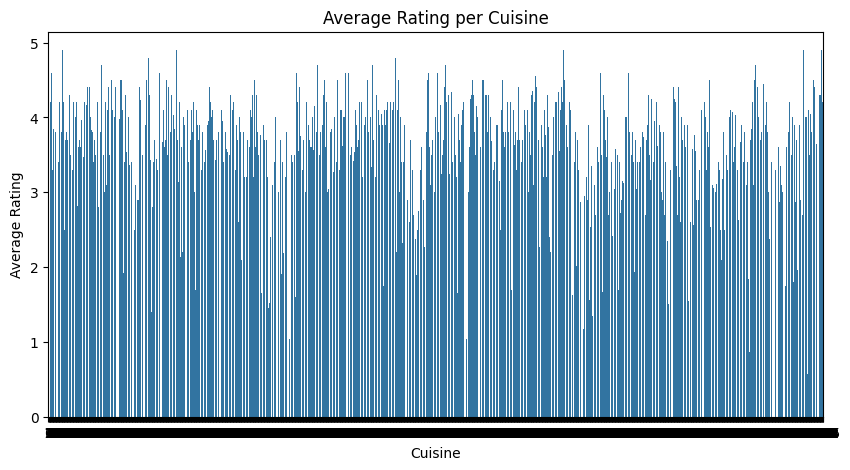

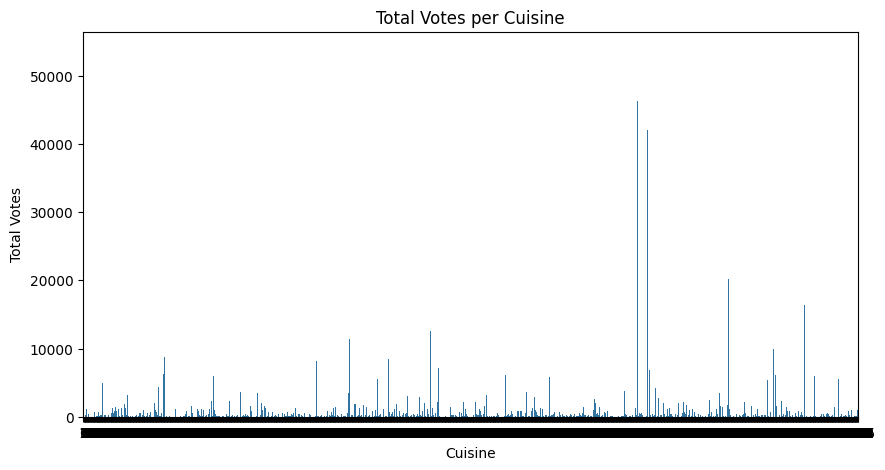

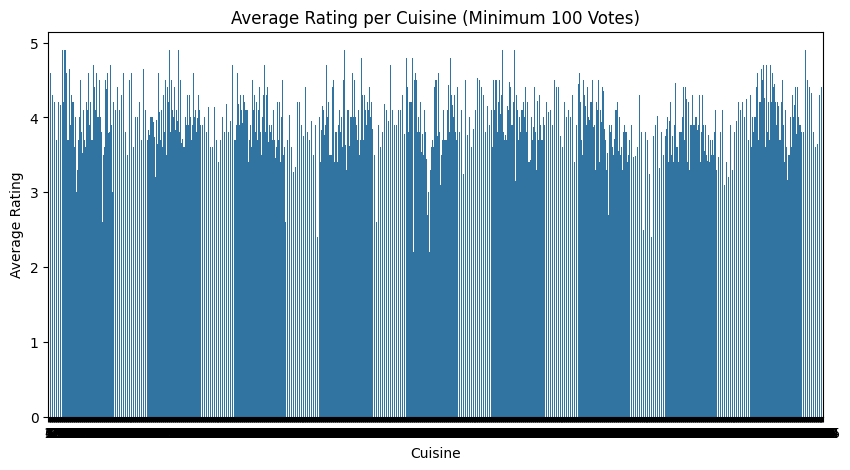

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=cuisine_ratings.index, y=cuisine_ratings.values)
plt.title('Average Rating per Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.show()

cuisine_votes = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=cuisine_votes.index, y=cuisine_votes.values)
plt.title('Total Votes per Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Total Votes')
plt.show()

min_votes = 100
cuisine_ratings_high_votes = df[df['Votes'] > min_votes].groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=cuisine_ratings_high_votes.index, y=cuisine_ratings_high_votes.values)
plt.title('Average Rating per Cuisine (Minimum 100 Votes)')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.show()


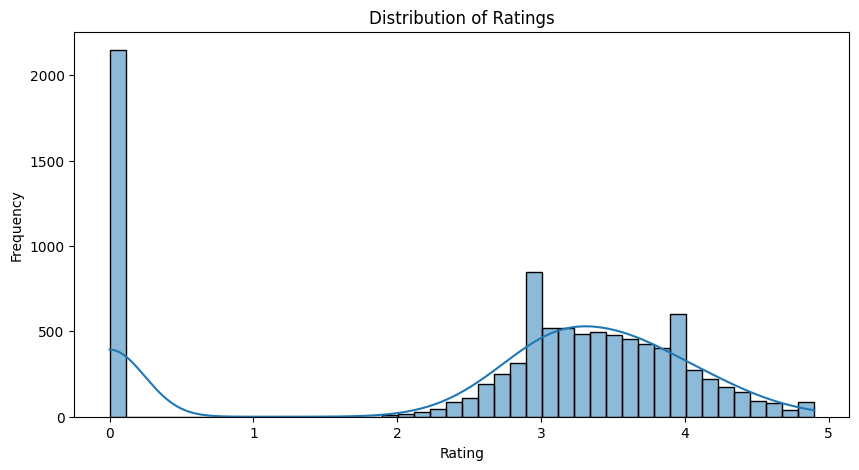

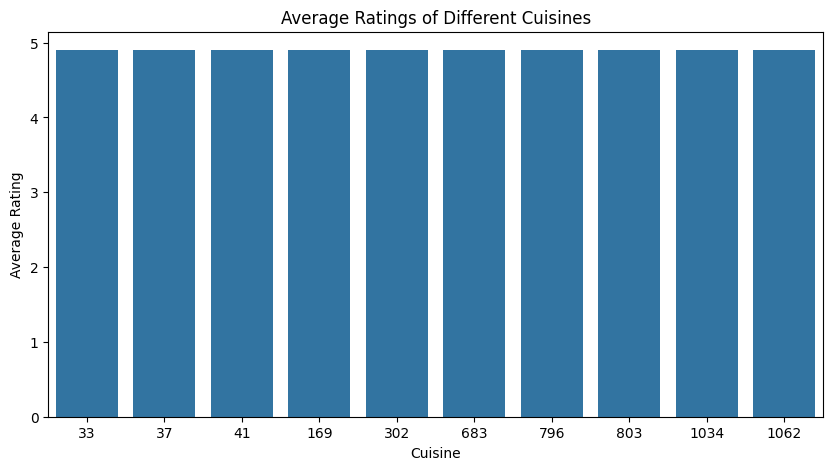

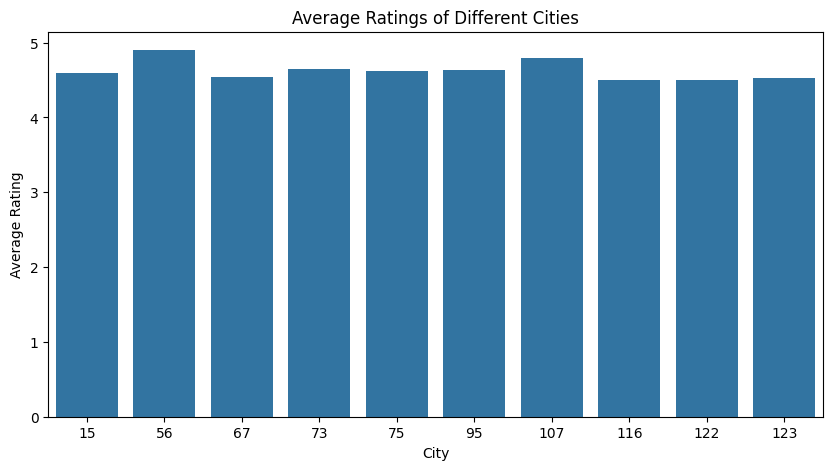

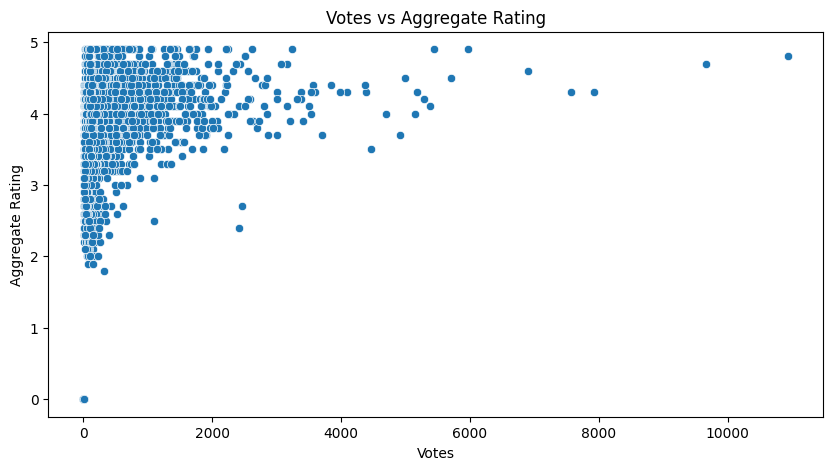

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['Aggregate rating'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
city_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=cuisine_ratings.index[:10], y=cuisine_ratings.values[:10])
plt.title('Average Ratings of Different Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=city_ratings.index[:10], y=city_ratings.values[:10])
plt.title('Average Ratings of Different Cities')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Votes'], y=df['Aggregate rating'])
plt.title('Votes vs Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()
